In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [20]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [21]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [22]:
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [23]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for x in yes_no_cols:
    data [x] = data [x].map({ 'yes':1 , 'no': 0})

In [24]:
data = pd.get_dummies( data , columns=['furnishingstatus'] ,drop_first = True ,dtype=int)

In [25]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


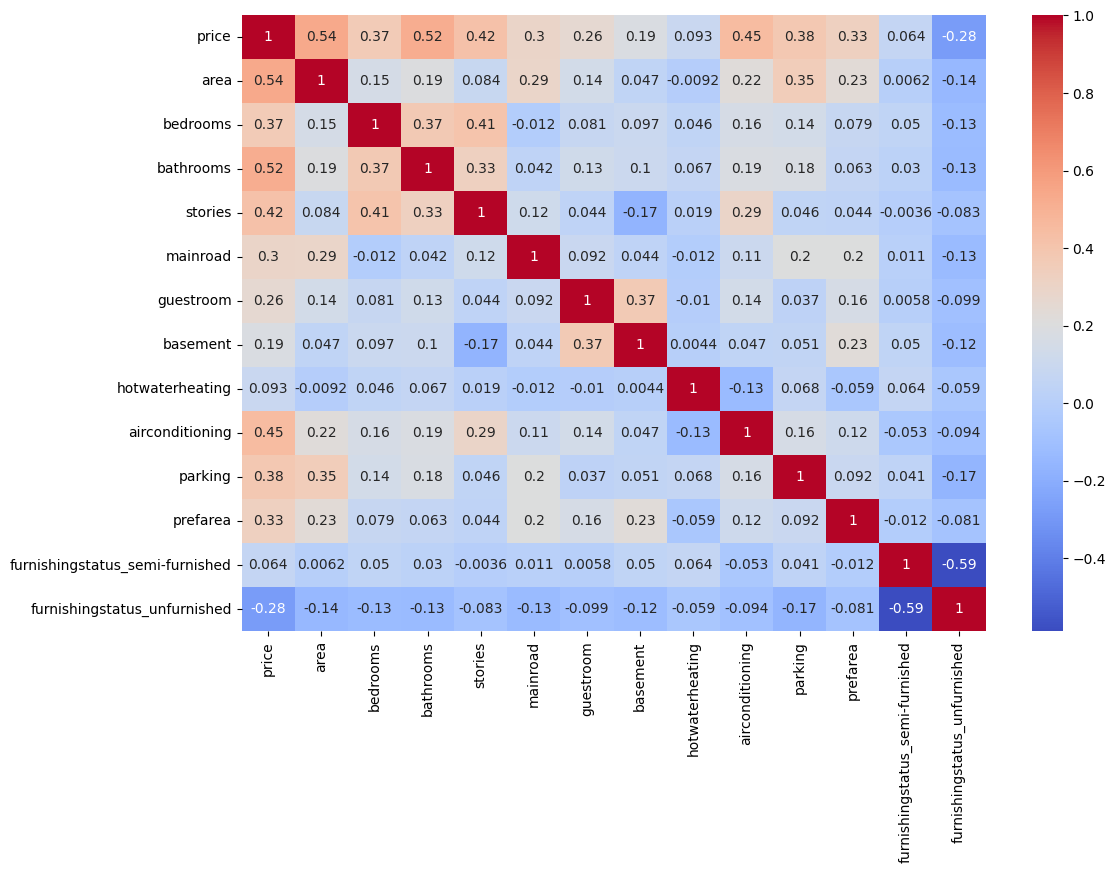

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [27]:
X = data.drop("price" ,  axis=1)
Y = data["price"]

In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size =0.2 , random_state =42)

In [29]:
model = LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
Y_pred = model.predict(X_test)

In [31]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

print("RMSE =", rmse)
print("R² =", r2)

RMSE = 1324506.9600914384
R² = 0.6529242642153186


In [32]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coeff)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


In [33]:
Xs = data[['area', 'bathrooms', 'airconditioning', 'stories',
          'parking', 'bedrooms', 'prefarea', 'mainroad',
          'furnishingstatus_unfurnished']]
Ys = data['price']


In [34]:
Xs_train , Xs_test , Ys_train , Ys_test = train_test_split(Xs, Ys , test_size =0.2 , random_state =42)

In [35]:
model.fit(Xs_train,Ys_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
Ys_pred = model.predict(Xs_test)

In [38]:
rmses = np.sqrt(mean_squared_error(Ys_test,Ys_pred))
rs2 = r2_score(Ys_test,Ys_pred)

print("RMSE =", rmses)
print("R² =", rs2)

RMSE = 1355311.2688588647
R² = 0.6365925200428808
